In [ ]:
import pandas as pd
import numpy as np
import scipy
import re
import string

import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [ ]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv", encoding='windows-1250')
print(df.shape)

(23486, 11)


In [ ]:
df['Review Text']

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 23486, dtype: object

In [ ]:
#merging title and review text
text_df = df[['Title', 'Review Text']]
text_df.head()

,Title,Review Text
0,NaN,Absolutely wonderful - silky and sexy and comf...
1,NaN,Love this dress! it's sooo pretty. i happene...
2,Some major design flaws,I had such high hopes for this dress and reall...
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl..."
4,Flattering shirt,This shirt is very flattering to all due to th...


In [ ]:
text_df.rename(columns={'Review Text': 'Text'}, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
df.drop(columns = ['Unnamed: 0','Unnamed: 0','Recommended IND','Recommended IND','Positive Feedback Count','Division Name','Department Name','Class Name'])

,Clothing ID,Age,Title,Review Text,Rating
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5
...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3


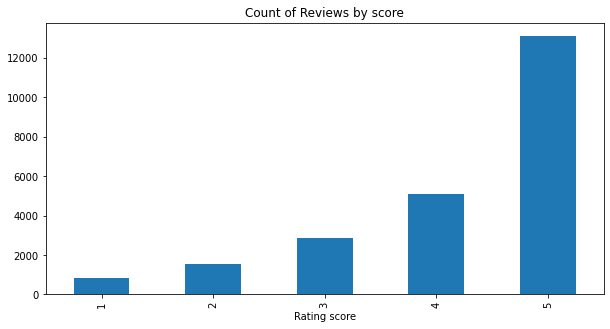

In [ ]:
ax = df['Rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by score',
          figsize=(10, 5))
ax.set_xlabel('Rating score')
plt.show()

In [ ]:
#count unique 'Rating' values in the dataframe
df['Rating'].nunique()

5

In [ ]:
#get every uniue values form 'Rating'
cnt_rating = 0

rating_scores = []

# loop for counting the unique values in Rating

for i in range(0, len(df['Rating'])):

    if df['Rating'][i] not in rating_scores:

        rating_scores.append(df['Rating'][i])

        cnt_rating += 1

print("No.of.unique values :",
      cnt_rating)

print("unique values :",
      rating_scores)

No.of.unique values : 5
unique values : [4, 5, 3, 2, 1]


In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# changing index cols with rename()
df.rename(index = {"Clothing ID":"Clothing_ID"}, inplace = True)

In [ ]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [ ]:
#create a new data frame with "Rating" and "comment" fields
df_subset = df[['Rating', 'Review Text']].copy()
#data clean-up
#remove all non-aphabet characters
df_subset['Review Text'] = df_subset['Review Text'].str.replace("[^a-zA-Z#]", " ")
#covert to lower-case
df_subset['Review Text'] = df_subset['Review Text'].str.casefold()
print (df_subset.head(10))

<ipython-input-13-f4ef3366d936>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_subset['Review Text'] = df_subset['Review Text'].str.replace("[^a-zA-Z#]", " ")


   Rating                                        Review Text
0       4  absolutely wonderful   silky and sexy and comf...
1       5  love this dress   it s sooo pretty   i happene...
2       3  i had such high hopes for this dress and reall...
3       5  i love  love  love this jumpsuit  it s fun  fl...
4       5  this shirt is very flattering to all due to th...
5       2  i love tracy reese dresses  but this one is no...
6       5  i aded this in my basket at hte last mintue to...
7       4  i ordered this in carbon for store pick up  an...
8       5  i love this dress  i usually get an xs but it ...
9       5  i m      and     lbs  i ordered the s petite t...


In [ ]:
#a simple SentimentIntensityAnalyzer to analye the overall rating
from nltk.sentiment.vader import SentimentIntensityAnalyzer

df=pd.read_csv('Womens Clothing E-Commerce Reviews.csv').astype(str)

nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

review = df['Review Text']
review = str(review).encode('utf-8')

df['scores'] = df['Review Text'].apply(lambda review:sid.polarity_scores(review))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
print(df['scores'])

0        {'neg': 0.0, 'neu': 0.272, 'pos': 0.728, 'comp...
1        {'neg': 0.0, 'neu': 0.664, 'pos': 0.336, 'comp...
2        {'neg': 0.027, 'neu': 0.792, 'pos': 0.181, 'co...
3        {'neg': 0.226, 'neu': 0.34, 'pos': 0.434, 'com...
4        {'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound...
                               ...                        
23481    {'neg': 0.065, 'neu': 0.547, 'pos': 0.388, 'co...
23482    {'neg': 0.068, 'neu': 0.735, 'pos': 0.197, 'co...
23483    {'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'comp...
23484    {'neg': 0.068, 'neu': 0.812, 'pos': 0.12, 'com...
23485    {'neg': 0.0, 'neu': 0.495, 'pos': 0.505, 'comp...
Name: scores, Length: 23486, dtype: object


In [ ]:
#visualize Sentiment Analysis of Review Text with VADER
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['sentiment_type']=''
df.loc[df.compound>0,'sentiment_type']='POSITIVE'
df.loc[df.compound==0,'sentiment_type']='NEUTRAL'
df.loc[df.compound<0,'sentiment_type']='NEGATIVE'

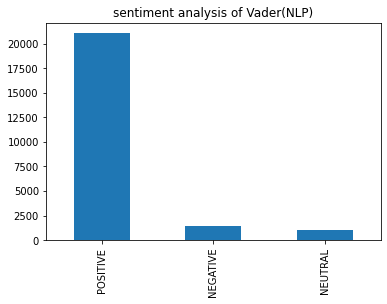

In [ ]:
df.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis of Vader(NLP)")

In [ ]:
#a simple SentimentIntensityAnalyzer to analye the title


review = df['Title']
review = str(review).encode('utf-8')

df['scores_title'] = df['Title'].apply(lambda review:sid.polarity_scores(review))

In [ ]:
print(df['scores_title'])

0        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3        {'neg': 0.0, 'neu': 0.378, 'pos': 0.622, 'comp...
4        {'neg': 0.0, 'neu': 0.303, 'pos': 0.697, 'comp...
                               ...                        
23481    {'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'comp...
23482    {'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'comp...
23483    {'neg': 0.0, 'neu': 0.6, 'pos': 0.4, 'compound...
23484    {'neg': 0.0, 'neu': 0.376, 'pos': 0.624, 'comp...
23485    {'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'comp...
Name: scores_title, Length: 23486, dtype: object


In [ ]:
#The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).

In [ ]:
#Sentiment Analysis with TextBlob


In [ ]:
df1 = df.drop(columns = ['Unnamed: 0','Unnamed: 0','Recommended IND','Recommended IND','Positive Feedback Count','Division Name','Department Name','Class Name'])

In [ ]:
from textblob import TextBlob


In [ ]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

In [ ]:
df1['polarity'] = df1['Review Text'].apply(pol)
df1['subjectivity'] = df1['Review Text'].apply(sub)
df1

,Clothing ID,Age,Title,Review Text,Rating,scores,compound,sentiment_type,scores_title,polarity,subjectivity
0,767,33,nan,Absolutely wonderful - silky and sexy and comf...,4,"{'neg': 0.0, 'neu': 0.272, 'pos': 0.728, 'comp...",0.8932,POSITIVE,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.633333,0.933333
1,1080,34,nan,Love this dress! it's sooo pretty. i happene...,5,"{'neg': 0.0, 'neu': 0.664, 'pos': 0.336, 'comp...",0.9729,POSITIVE,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.339583,0.725000
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,"{'neg': 0.027, 'neu': 0.792, 'pos': 0.181, 'co...",0.9427,POSITIVE,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.073675,0.356294
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,"{'neg': 0.226, 'neu': 0.34, 'pos': 0.434, 'com...",0.5727,POSITIVE,"{'neg': 0.0, 'neu': 0.378, 'pos': 0.622, 'comp...",0.550000,0.625000
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,"{'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound...",0.9291,POSITIVE,"{'neg': 0.0, 'neu': 0.303, 'pos': 0.697, 'comp...",0.512891,0.568750
...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,"{'neg': 0.065, 'neu': 0.547, 'pos': 0.388, 'co...",0.9152,POSITIVE,"{'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'comp...",0.552667,0.710000
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,"{'neg': 0.068, 'neu': 0.735, 'pos': 0.197, 'co...",0.6652,POSITIVE,"{'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'comp...",0.091667,0.708333
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,"{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'comp...",0.9343,POSITIVE,"{'neg': 0.0, 'neu': 0.6, 'pos': 0.4, 'compound...",0.414286,0.596429
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,"{'neg': 0.068, 'neu': 0.812, 'pos': 0.12, 'com...",0.6692,POSITIVE,"{'neg': 0.0, 'neu': 0.376, 'pos': 0.624, 'comp...",0.322222,0.577778


In [ ]:
vader = SentimentIntensityAnalyzer()

def vader_scores(feedbacktext, category):
    return vader.polarity_scores(feedbacktext).get(category)

df1["Negative_Score"] = df1.apply(lambda row : vader_scores(df1["Review Text"][row.name], "neg"),axis=1)
df1["Neutral_Score"] = df.apply(lambda row : vader_scores(df1["Review Text"][row.name], "neu"),axis=1)
df1["Positive_Score"] = df1.apply(lambda row : vader_scores(df1["Review Text"][row.name], "pos"),axis=1)
df1["Compound_Score"] = df1.apply(lambda row : vader_scores(df1["Review Text"][row.name], "compound"),axis=1)
df1

,Clothing ID,Age,Title,Review Text,Rating,scores,compound,sentiment_type,scores_title,polarity,subjectivity,Review_length,sentiment_score,Negative_Score,Neutral_Score,Positive_Score,Compound_Score
0,767,33,nan,Absolutely wonderful - silky and sexy and comf...,5,"{'neg': 0.0, 'neu': 0.272, 'pos': 0.728, 'comp...",0.8932,compound,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.633333,0.933333,53,0.8195,0.000,0.272,0.728,0.8932
1,1080,34,nan,Love this dress! it's sooo pretty. i happene...,5,"{'neg': 0.0, 'neu': 0.664, 'pos': 0.336, 'comp...",0.9729,compound,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.339583,0.725000,303,0.8195,0.000,0.664,0.336,0.9729
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,5,"{'neg': 0.027, 'neu': 0.792, 'pos': 0.181, 'co...",0.9427,compound,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.073675,0.356294,500,0.8195,0.027,0.792,0.181,0.9427
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,"{'neg': 0.226, 'neu': 0.34, 'pos': 0.434, 'com...",0.5727,compound,"{'neg': 0.0, 'neu': 0.378, 'pos': 0.622, 'comp...",0.550000,0.625000,124,0.8195,0.226,0.340,0.434,0.5727
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,"{'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound...",0.9291,compound,"{'neg': 0.0, 'neu': 0.303, 'pos': 0.697, 'comp...",0.512891,0.568750,192,0.8195,0.000,0.700,0.300,0.9291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,"{'neg': 0.065, 'neu': 0.547, 'pos': 0.388, 'co...",0.9152,compound,"{'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'comp...",0.552667,0.710000,131,0.8195,0.065,0.547,0.388,0.9152
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",5,"{'neg': 0.068, 'neu': 0.735, 'pos': 0.197, 'co...",0.6652,compound,"{'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'comp...",0.091667,0.708333,223,0.8195,0.068,0.735,0.197,0.6652
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",5,"{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'comp...",0.9343,compound,"{'neg': 0.0, 'neu': 0.6, 'pos': 0.4, 'compound...",0.414286,0.596429,208,0.8195,0.000,0.704,0.296,0.9343
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,5,"{'neg': 0.068, 'neu': 0.812, 'pos': 0.12, 'com...",0.6692,compound,"{'neg': 0.0, 'neu': 0.376, 'pos': 0.624, 'comp...",0.322222,0.577778,427,0.8195,0.068,0.812,0.120,0.6692


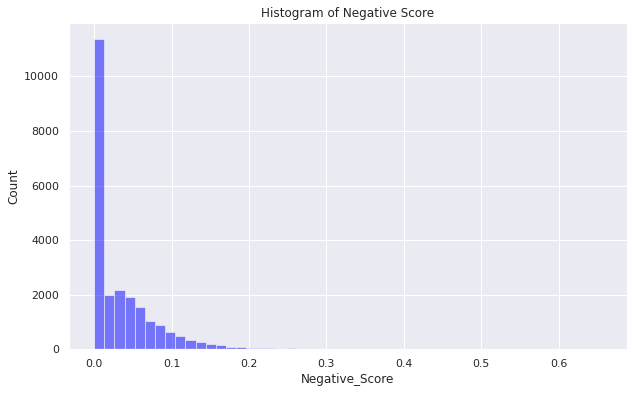

In [ ]:
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df1.Negative_Score, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Negative_Score')
plt.ylabel('Count')
plt.title('Histogram of Negative Score')
plt.show();

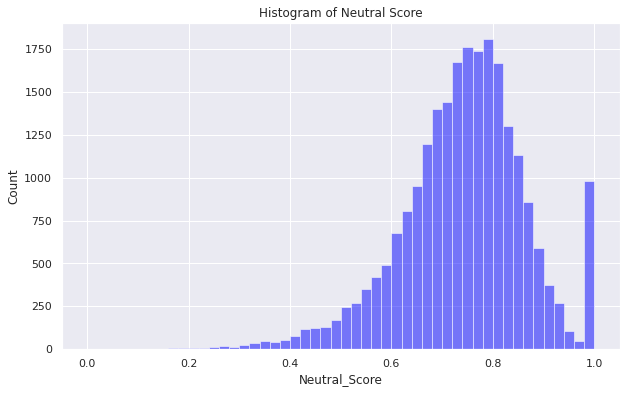

In [ ]:
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df1.Neutral_Score, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Neutral_Score')
plt.ylabel('Count')
plt.title('Histogram of Neutral Score')
plt.show();

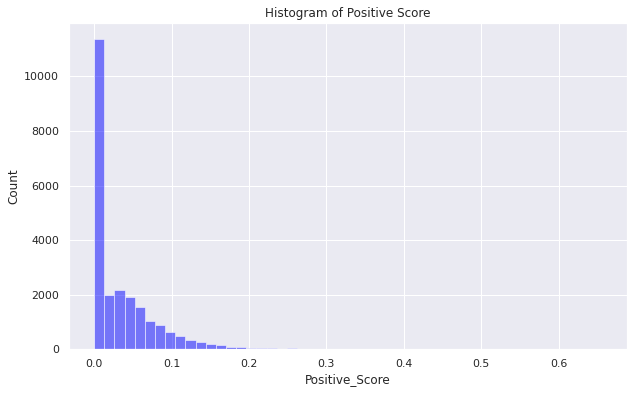

In [ ]:
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df1.Negative_Score, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Positive_Score')
plt.ylabel('Count')
plt.title('Histogram of Positive Score')
plt.show();

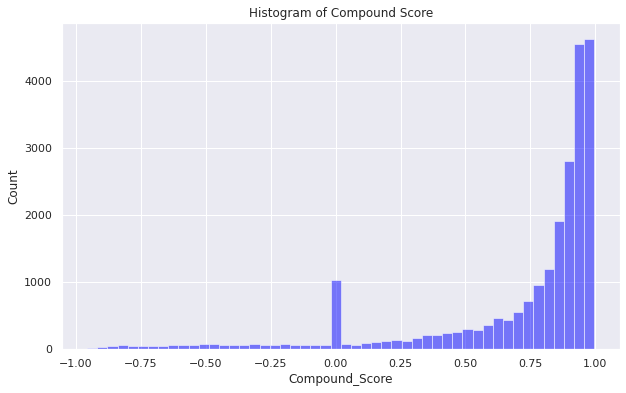

In [ ]:
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df1.Compound_Score, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Compound_Score')
plt.ylabel('Count')
plt.title('Histogram of Compound Score')
plt.show();

In [ ]:
#Count the ratio of positive and negative sentiment
df1["sentiment_type"].value_counts()

POSITIVE    21067
NEGATIVE     1434
NEUTRAL       985
Name: sentiment_type, dtype: int64

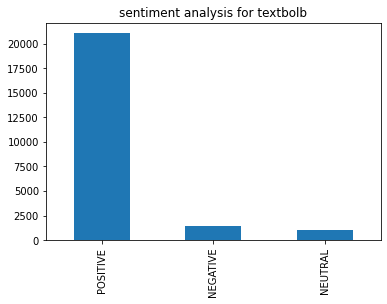

In [ ]:
df1.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis for textbolb")

In [ ]:
#sentimental proportion of Review Text


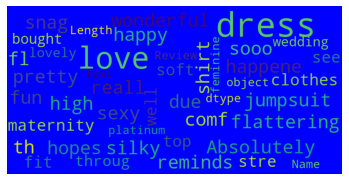

In [ ]:
#Wordcloud for "Review Text""
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(background_color='blue',
                     stopwords = stopwords_set,
                      max_words = 300,
                      max_font_size = 40,
                      scale = 2,
                      random_state=42
                     ).generate(str(df['Review Text']))

print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

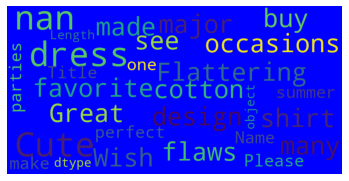

In [ ]:
#Wordcloud for "Title"
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(background_color='blue',
                     stopwords = stopwords_set,
                      max_words = 300,
                      max_font_size = 40,
                      scale = 2,
                      random_state=42
                     ).generate(str(df['Title']))

print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
#distribution of polarity

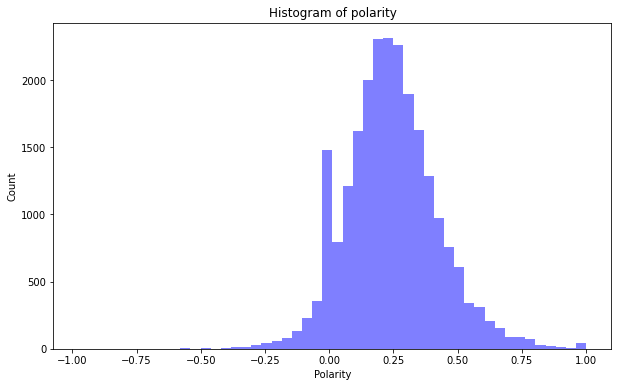

In [ ]:
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df1.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show();

In [ ]:
#distribution of subjectivity

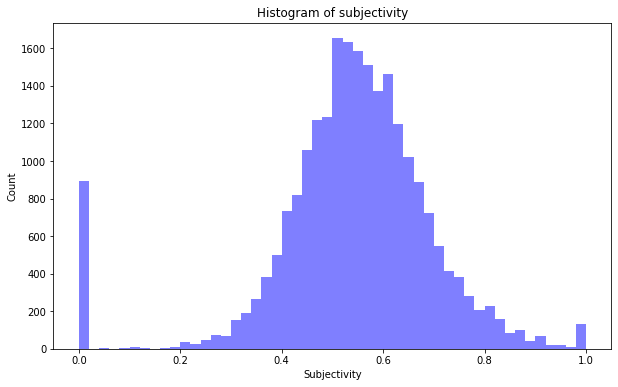

In [ ]:
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df1.subjectivity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Subjectivity')
plt.ylabel('Count')
plt.title('Histogram of subjectivity')
plt.show();

In [ ]:
#Sort clothing ID according to row frequency

In [ ]:
df['sort_col'] = df['Clothing ID'].map(df['Clothing ID'].value_counts())
df = df.sort_values(by='sort_col', ascending=False).drop('sort_col', axis=1)
print(df)

     Clothing ID  Count
0              0      1
474           34      1
479          344      1
480          345      1
481          346      1
...          ...    ...
93          1081    582
107         1094    756
1054         862    806
98          1086    291
89          1078   1024

[1206 rows x 2 columns]


In [ ]:
df = df.groupby(['Clothing ID'])['Rating'].count().reset_index(
  name='Count').sort_values(['Count'], ascending=True)

# print dataframe
print(df)

     Clothing ID  Count
0              0      1
477          342      1
899          722      1
479          344      1
480          345      1
...          ...    ...
1065         872    545
93          1081    582
107         1094    756
1054         862    806
89          1078   1024

[1206 rows x 2 columns]


In [ ]:
#sorting Text Length
df1['Review_length'] = df1['Review Text'].apply(len)
print(text_df.shape)
text_df.head()

(23486, 2)


,Title,Text
0,NaN,Absolutely wonderful - silky and sexy and comf...
1,NaN,Love this dress! it's sooo pretty. i happene...
2,Some major design flaws,I had such high hopes for this dress and reall...
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl..."
4,Flattering shirt,This shirt is very flattering to all due to th...


In [ ]:
df1['Review_length'].describe()

count    23486.000000
mean       297.689602
std        152.363034
min          3.000000
25%        173.000000
50%        292.000000
75%        451.000000
max        508.000000
Name: Review_length, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


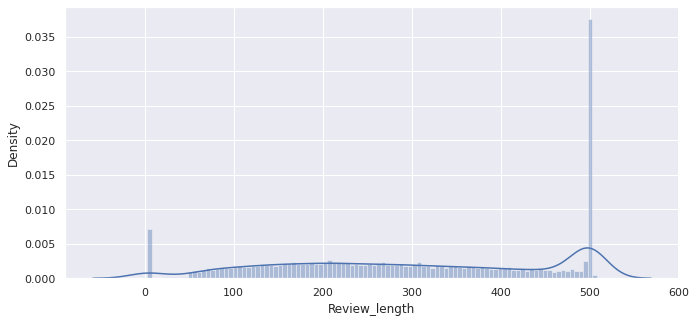

In [ ]:
sns.set(rc={'figure.figsize':(11,5)})
sns.distplot(df1['Review_length'] ,hist=True, bins=100)

In [ ]:
!pip install nbconvert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!jupyter nbconvert --to html test.ipynb

[NbConvertApp] WARNING | pattern 'test.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execut